<a href="https://colab.research.google.com/github/majedSD/Assignment-Digital-Image-Processing/blob/main/2019331563.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install kaggle

In [6]:
!pip install opencv-python-headless

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
! mkdir ~/.kaggle

In [9]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json': No such file or directory


In [10]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json': No such file or directory


In [11]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [13]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [14]:
! mkdir /content/kaggle_data

In [15]:
%%shell
ls /
if [ ! -d "/root/.kaggle/kaggle.json" ]; then
  echo "$DIRECTORY does not exist."
fi

bin			    datalab  kaggle  libx32		       opt   sbin  tools
boot			    dev      lib     media		       proc  srv   usr
content			    etc      lib32   mnt		       root  sys   var
cuda-keyring_1.0-1_all.deb  home     lib64   NGC-DL-CONTAINER-LICENSE  run   tmp
 does not exist.


In [16]:
! kaggle datasets download -p /content/kaggle_data tenxengineers/denoising-dataset-multiple-iso-levels

Dataset URL: https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
License(s): CC-BY-SA-4.0
100% 2.40G/2.40G [00:27<00:00, 203MB/s]
100% 2.40G/2.40G [00:27<00:00, 94.4MB/s]


In [17]:
! unzip /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip -d /content/kaggle_data/denoising-dataset-multiple-iso-levels/

Archive:  /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene1.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene11.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene12.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/Alp

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2

In [19]:
# Create a list of image paths
txt_files = []
for root, dirs, files in os.walk("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset"):
    for file in files:
        if file.endswith("AlphaISP_2592x1536_8bits_Scene34.png"):
            txt_files.append(os.path.join(root, file))

In [20]:
# Function to display an image with a title using matplotlib
def customShow(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Helper function to display images
def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/Bayer Denoising/Noised/AlphaISP_2592x1536_8bits_Scene34.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/Bayer Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene34.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene34.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene34.png


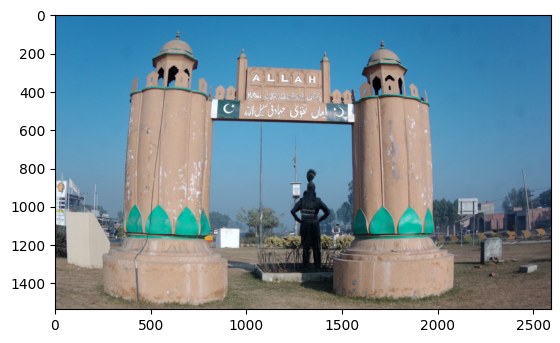

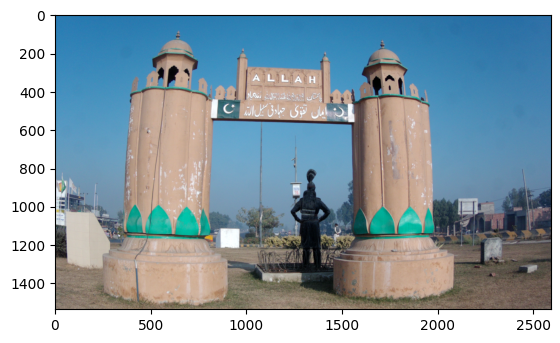

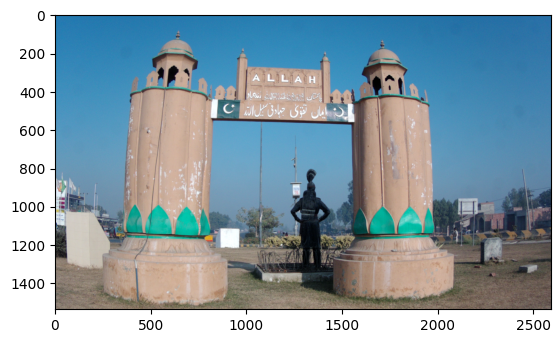

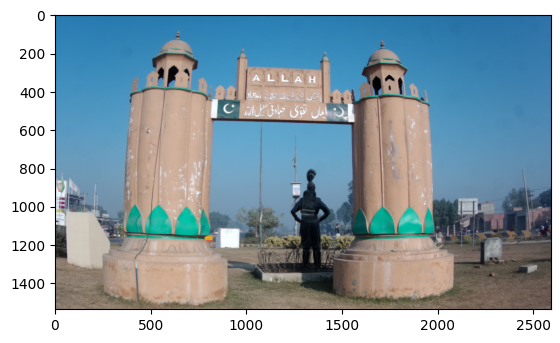

In [21]:
from skimage import io

for noisy_image in txt_files:
  print(noisy_image)
  plt.figure()
  plt.imshow(io.imread(noisy_image))
plt.show()

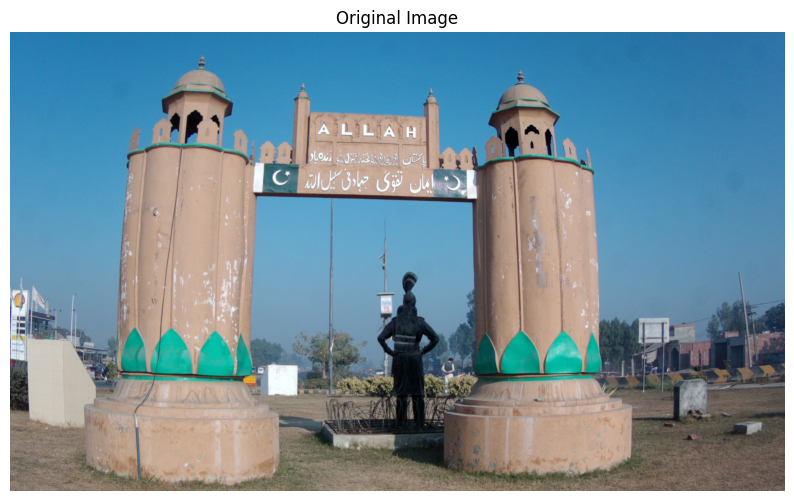

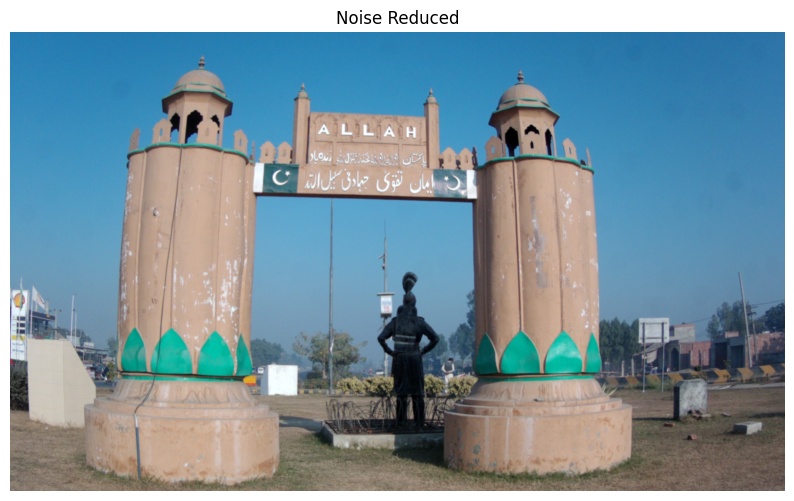

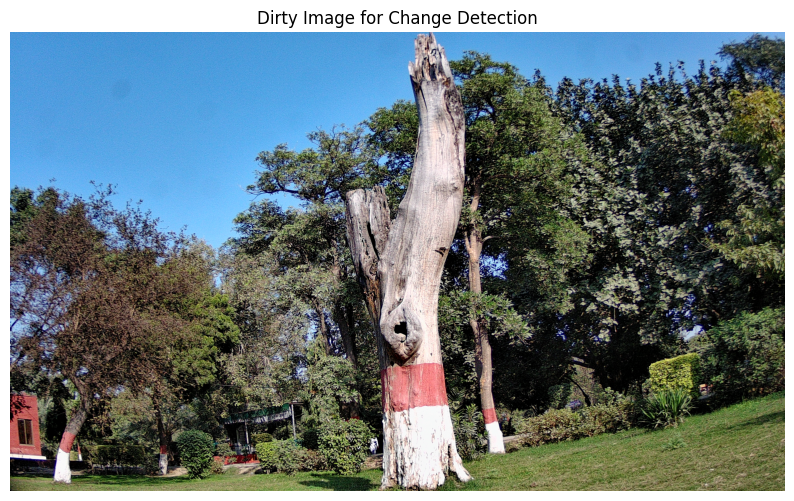

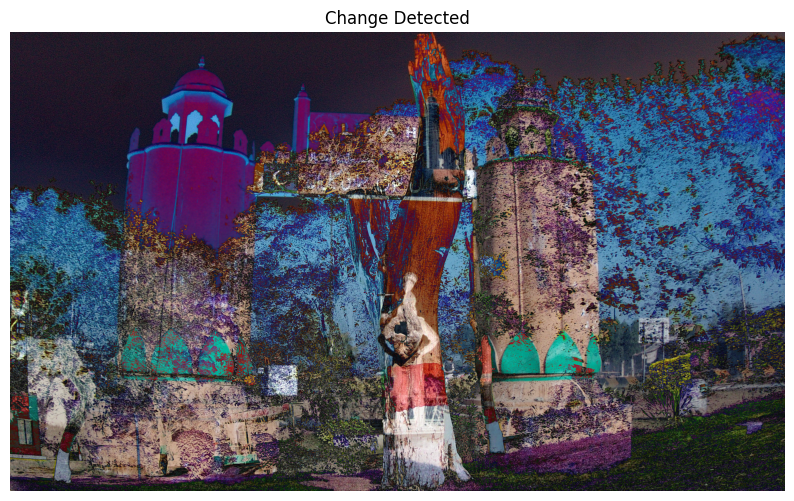

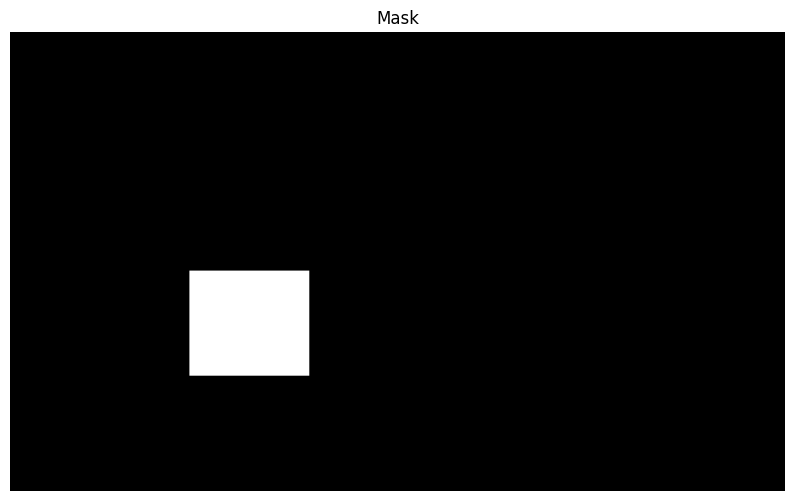

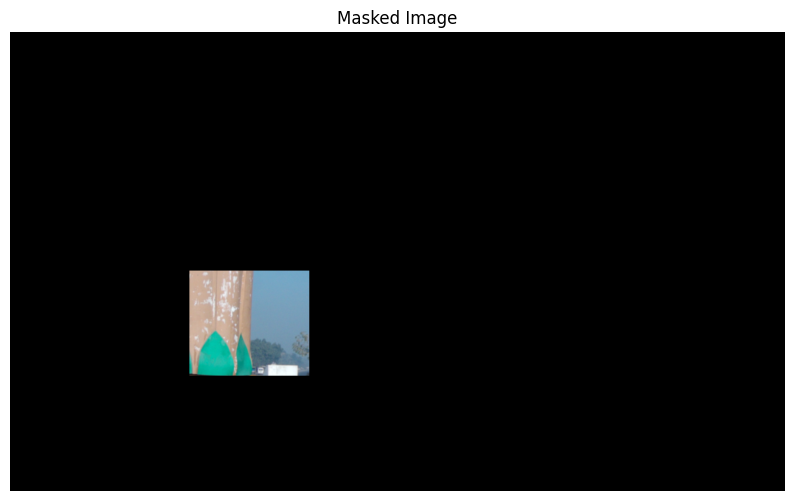

Image is saving and process is completed


In [27]:

for image_path in txt_files:
# Noise Reduction with GaussianBlur
    image = cv2.imread(image_path)
    show_image('Original Image', image)

    noise_reduced = cv2.GaussianBlur(image, (5, 5), 0)
    show_image('Noise Reduced', noise_reduced)

    # 2. Change Detection

    dirty_image_path = image_path.replace("AlphaISP_2592x1536_8bits_Scene34.png", "AlphaISP_2592x1536_8bits_Scene1.png")

    if os.path.exists(dirty_image_path):
        dirty_image = cv2.imread(dirty_image_path)
        show_image('Dirty Image for Change Detection', dirty_image)


        change_detected = cv2.absdiff(image, dirty_image)
        show_image('Change Detected', change_detected)
    else:
        print(f"Clean image not found for {image_path}")
        change_detected = None

    # 3. Masking

    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.rectangle(mask, (600, 800), (1000, 1150), 255, -1)
    show_image('Mask', mask)

    # Apply the mask to the noise-reduced image
    masked_image = cv2.bitwise_and(noise_reduced, noise_reduced, mask=mask)
    show_image('Masked Image', masked_image)
    break

print("Image is saving and process is completed")